In [104]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [105]:
popdf=pd.read_pickle('mergeddfclean.p')

In [106]:
#remove the top percentiles from the price changed a lot, and then create a new column
#where 0 is price != increase, and 1 is price increased, run a logistic regression and see what
q = popdf["price"].quantile(0.98)
popdf = popdf[popdf["price"] < q]

q = popdf["price"].quantile(0.02)
popdf  = popdf[popdf["price"] > q]


In [107]:
import pandas as pd
import seaborn as sns
rates=pd.read_pickle('mortunempcpi.p')
rates.info()
rates.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 5 columns):
mortgrate    80 non-null float64
unemp        80 non-null float64
month        81 non-null int64
year         81 non-null int64
cpi          81 non-null float64
dtypes: float64(3), int64(2)
memory usage: 3.8 KB


,mortgrate,unemp,month,year,cpi
count,80.000000,80.000000,81.000000,81.000000,81.000000
mean,-0.004124,-0.008163,6.333333,2012.888889,0.001383
std,0.033593,0.020650,3.420526,1.962142,0.003163
min,-0.066815,-0.060000,1.000000,2010.000000,-0.005670
25%,-0.028227,-0.021001,3.000000,2011.000000,-0.001040
50%,-0.007365,0.000000,6.000000,2013.000000,0.001245
75%,0.010795,0.000000,9.000000,2015.000000,0.003698
max,0.149718,0.042553,12.000000,2016.000000,0.009751


In [108]:
rates["period"] = rates["year"].map(str) + '-' + rates["month"].map(str)
rates['period'] =  pd.to_datetime(rates['period'], format='%Y-%m')
rates.set_index('period', inplace=True)
#rates['period'].reset_index()
rates.head()

,mortgrate,unemp,month,year,cpi
period,,,,,
2010-01-01,NaN,NaN,1,2010,0.003417
2010-02-01,-0.007952,0.000000,2,2010,0.000249
2010-03-01,-0.004008,0.010204,3,2010,0.004106
2010-04-01,0.026157,0.000000,4,2010,0.001737
2010-05-01,-0.041176,-0.030303,5,2010,0.000775


In [109]:
popdf.columns
popdf.set_index('Year', inplace=True)
popdf['month'] = pd.DatetimeIndex(popdf.index).month
popdf['year']=pd.DatetimeIndex(popdf.index).year

In [110]:
ratespop=pd.merge(rates, popdf, how='inner', left_on=['month', 'year'],right_on=['month', 'year'])
print(ratespop.shape)
ratespop2=ratespop.drop('year', axis=1)
ratespop2=ratespop2.drop('month', axis=1)
ratespop2=ratespop2.drop('county', axis=1)
ratespop2=ratespop2.drop('price', axis=1)

(9320, 13)


In [111]:
ratespop2.corr()

,mortgrate,unemp,cpi,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016
mortgrate,1.000000,-0.196445,0.787337,-0.034643,-0.043474,0.023922,-0.054041,-0.033806,0.003776
unemp,-0.196445,1.000000,-0.734586,0.041237,-0.002148,-0.027799,0.013611,-0.004671,-0.003367
cpi,0.787337,-0.734586,1.000000,-0.046036,-0.031679,0.030251,-0.039785,-0.024559,0.002454
RDEATH2016,-0.034643,0.041237,-0.046036,1.000000,-0.163762,-0.824252,-0.443752,-0.083083,-0.331764
RNETMIG2016,-0.043474,-0.002148,-0.031679,-0.163762,1.000000,0.038587,0.127528,0.983157,-0.106269
RNATURALINC2016,0.023922,-0.027799,0.030251,-0.824252,0.038587,1.000000,0.413095,-0.037277,0.807610
RINTERNATIONALMIG2016,-0.054041,0.013611,-0.039785,-0.443752,0.127528,0.413095,1.000000,-0.055890,0.226079
RDOMESTICMIG2016,-0.033806,-0.004671,-0.024559,-0.083083,0.983157,-0.037277,-0.055890,1.000000,-0.148635
RBIRTH2016,0.003776,-0.003367,0.002454,-0.331764,-0.106269,0.807610,0.226079,-0.148635,1.000000


In [112]:
ratespop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9320 entries, 0 to 9319
Data columns (total 9 columns):
mortgrate                9320 non-null float64
unemp                    9320 non-null float64
cpi                      9320 non-null float64
RDEATH2016               9320 non-null float64
RNETMIG2016              9320 non-null float64
RNATURALINC2016          9320 non-null float64
RINTERNATIONALMIG2016    9320 non-null float64
RDOMESTICMIG2016         9320 non-null float64
RBIRTH2016               9320 non-null float64
dtypes: float64(9)
memory usage: 728.1 KB


In [113]:
ratespop2.isnull().sum()

mortgrate                0
unemp                    0
cpi                      0
RDEATH2016               0
RNETMIG2016              0
RNATURALINC2016          0
RINTERNATIONALMIG2016    0
RDOMESTICMIG2016         0
RBIRTH2016               0
dtype: int64

In [114]:
pca=PCA()
pca=pca.fit(ratespop2)
print(pca.explained_variance_)
print(pca.components_)

var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

[1.67908255e+02 2.39359359e+01 4.22729487e+00 2.84591986e+00
 4.13845496e-04 2.55274324e-04 3.26655239e-07 4.16245270e-19
 4.93679901e-20]
[[-5.75861450e-05 -4.71063249e-06 -7.21261657e-06 -2.41443316e-02
   7.09187299e-01  4.93697020e-04  4.99565538e-03  7.04191643e-01
  -2.36506346e-02]
 [ 7.44030862e-05 -9.01102057e-05  1.78621642e-05 -4.18736166e-01
   8.18247490e-02  7.98800946e-01  1.67571142e-01 -8.57463934e-02
   3.80064780e-01]
 [-1.42592704e-04 -4.51430102e-05 -3.72093731e-06 -4.79140439e-01
   2.33912341e-01 -1.24467989e-01  5.09713428e-01 -2.75801087e-01
  -6.03608428e-01]
 [-9.72809841e-04  4.87978541e-04 -1.60717395e-04  5.11045857e-01
   3.19858725e-01 -1.14416519e-01  6.15429387e-01 -2.95570662e-01
   3.96629337e-01]
 [-8.57906849e-01  4.89241488e-01 -1.56962969e-01 -5.58294765e-04
  -4.00110339e-04  2.26661827e-04 -7.09160282e-04  3.09049362e-04
  -3.31633017e-04]
 [ 5.00974751e-01  8.64338415e-01 -4.40838431e-02 -4.10759223e-05
   7.10158610e-05  1.26660817e-05  9.931

In [118]:
Z = pca.transform(ratespop2)

features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
Z = pd.DataFrame(Z, columns=features_pca)
Z.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,7.257891,0.589137,-0.747965,-1.066789,-0.024137,-0.001601,0.001090,-9.949948e-13,6.240798e-11
1,20.332331,0.243135,-1.055247,0.251952,-0.026224,-0.001146,0.001086,1.258096e-10,-4.840874e-11
2,-3.007800,-1.626953,-2.167134,0.025785,-0.024945,-0.002120,0.001104,-4.799717e-12,1.193544e-10
3,1.244518,1.325772,-2.087272,-0.725813,-0.024005,-0.001895,0.001089,1.056491e-10,1.756789e-10
4,7.469657,-6.375063,0.335907,-0.476887,-0.025676,-0.001729,0.001113,7.944222e-11,-1.618503e-10


In [116]:
Z.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
PC1,1.000000e+00,-2.312925e-16,-1.850072e-16,5.646162e-16,4.433713e-14,1.278194e-13,-5.594137e-13,-5.893166e-07,1.051095e-06
PC2,-2.312925e-16,1.000000e+00,-3.387038e-16,1.066953e-15,3.316303e-15,-6.786006e-15,2.808171e-13,6.020347e-07,-3.623488e-06
PC3,-1.850072e-16,-3.387038e-16,1.000000e+00,-2.477984e-16,1.286630e-14,-9.942074e-15,-1.975331e-13,2.014268e-07,2.827589e-06
PC4,5.646162e-16,1.066953e-15,-2.477984e-16,1.000000e+00,-1.117544e-14,1.242040e-14,2.614706e-13,-5.061260e-07,-2.140327e-06
PC5,4.433713e-14,3.316303e-15,1.286630e-14,-1.117544e-14,1.000000e+00,1.043891e-14,-1.166502e-13,-3.600169e-07,3.020950e-07
PC6,1.278194e-13,-6.786006e-15,-9.942074e-15,1.242040e-14,1.043891e-14,1.000000e+00,-1.527426e-13,-2.104332e-07,-2.481415e-07
PC7,-5.594137e-13,2.808171e-13,-1.975331e-13,2.614706e-13,-1.166502e-13,-1.527426e-13,1.000000e+00,-3.308488e-07,-1.102646e-06
PC8,-5.893166e-07,6.020347e-07,2.014268e-07,-5.061260e-07,-3.600169e-07,-2.104332e-07,-3.308488e-07,1.000000e+00,-1.733223e-08
PC9,1.051095e-06,-3.623488e-06,2.827589e-06,-2.140327e-06,3.020950e-07,-2.481415e-07,-1.102646e-06,-1.733223e-08,1.000000e+00


In [53]:
np.cov(Z.values.T)

array([[ 1.67908255e+02, -1.61764939e-14, -4.91028567e-15,
         1.43343743e-14,  1.16886148e-14,  2.64572139e-14,
        -4.14255615e-15, -4.92673689e-15,  3.02622201e-15],
       [-1.61764939e-14,  2.39359359e+01, -3.69033892e-15,
         9.05810463e-15,  3.27378191e-16, -5.28103511e-16,
         7.85240200e-16,  1.90029669e-15, -3.93889839e-15],
       [-4.91028567e-15, -3.69033892e-15,  4.22729487e+00,
        -5.61175505e-16,  5.37058028e-16, -3.25704338e-16,
        -2.32172466e-16,  2.67191859e-16,  1.29172544e-15],
       [ 1.43343743e-14,  9.05810463e-15, -5.61175505e-16,
         2.84591986e+00, -3.84962298e-16,  3.36361002e-16,
         2.52144310e-16, -5.50864316e-16, -8.02258254e-16],
       [ 1.16886148e-14,  3.27378191e-16,  5.37058028e-16,
        -3.84962298e-16,  4.13845496e-04,  3.47447298e-18,
        -1.38290749e-18, -4.72516226e-18,  1.36548029e-18],
       [ 2.64572139e-14, -5.28103511e-16, -3.25704338e-16,
         3.36361002e-16,  3.47447298e-18,  2.552743

In [54]:
demo_pcs = ratespop2.copy()
demo_pcs['PC1'] = Z.iloc[:,0]
demo_pcs['PC2'] = Z.iloc[:,1]

demo_pcs = pd.melt(demo_pcs, id_vars=['PC1','PC2'])

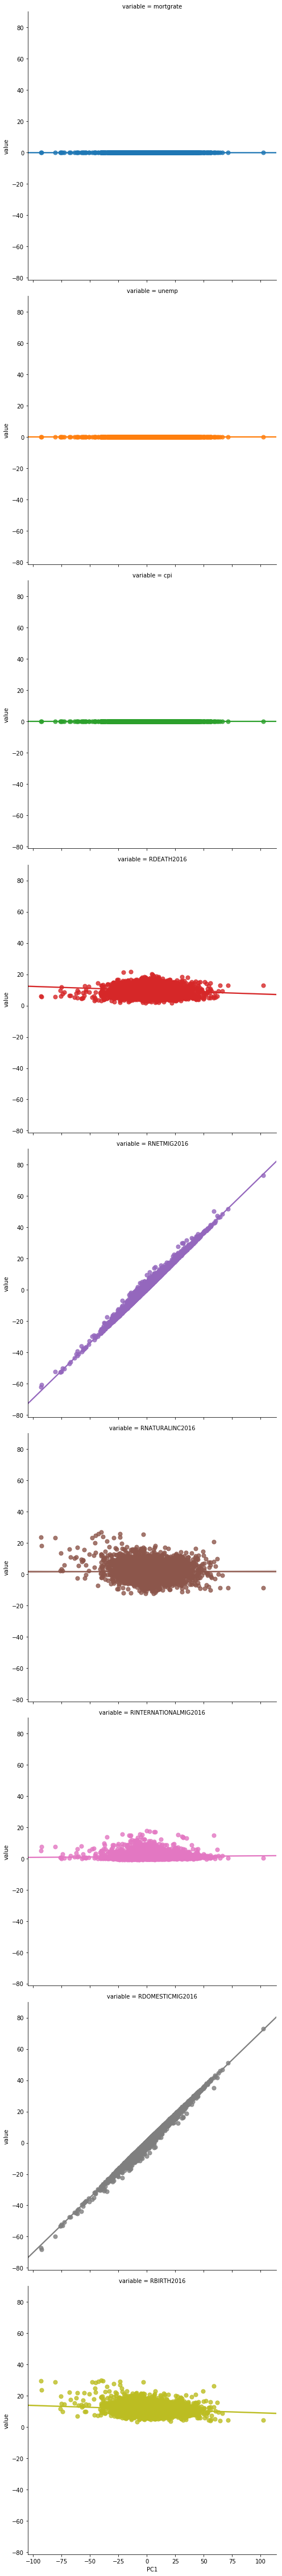

In [55]:
pc1 = sns.lmplot(x="PC1", y="value", row="variable", hue="variable", 
                 data=demo_pcs, size=7, scatter_kws={'s':50})

In [56]:
var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [8.44107580e-01 1.20330623e-01 2.12514366e-02 1.43069948e-02
 2.08048211e-06 1.28331387e-06 1.64215966e-09 2.09254624e-21
 2.48182525e-22]
Cumulative explained variance:  [0.84410758 0.9644382  0.98568964 0.99999663 0.99999872 1.
 1.         1.         1.        ]


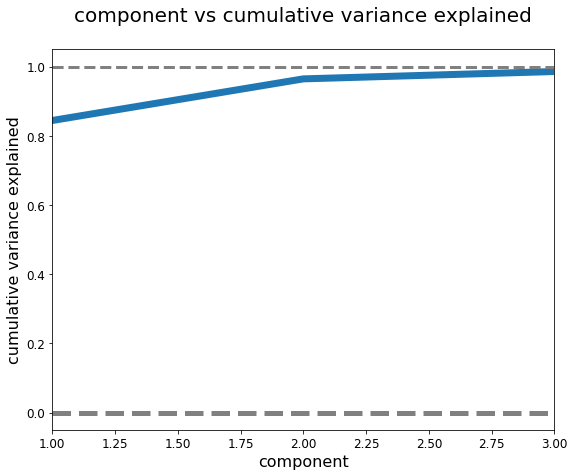

In [57]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the cumulative explained variance
component_number = [1,2,3,4,5,6,7,8,9]
plt.plot(component_number, cum_var_exp, lw=7)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=3, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([1,3])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

features = ['mortgrate', 'unemp', 'cpi', 'RDEATH2016', 'RNETMIG2016',
       'RNATURALINC2016', 'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016',
       'RBIRTH2016']

X = ratespop[features]
y = ratespop['price']

ss = StandardScaler()
Xs = ss.fit_transform(X)

lr = LinearRegression()

print(cross_val_score(lr, Xs, y, cv=5).mean())

-1.3907401694152868


In [59]:
from itertools import combinations

for features_2 in combinations(features, 2):
    X = ratespop[list(features_2)]
    Xs = ss.fit_transform(X)
    lr = LinearRegression()
    print(features_2, cross_val_score(lr, Xs, y, cv=5).mean())

('mortgrate', 'unemp') -1.139776805702642
('mortgrate', 'cpi') -1.2030790182594184
('mortgrate', 'RDEATH2016') -0.35027546051386993
('mortgrate', 'RNETMIG2016') -0.30560481025367037
('mortgrate', 'RNATURALINC2016') -0.3431829799157069
('mortgrate', 'RINTERNATIONALMIG2016') -0.3303204644262593
('mortgrate', 'RDOMESTICMIG2016') -0.3083243573656843
('mortgrate', 'RBIRTH2016') -0.33366339661167355
('unemp', 'cpi') -1.236266986434883
('unemp', 'RDEATH2016') -0.35006539864861835
('unemp', 'RNETMIG2016') -0.2950028235830481
('unemp', 'RNATURALINC2016') -0.3438323249685635
('unemp', 'RINTERNATIONALMIG2016') -0.3293277763895782
('unemp', 'RDOMESTICMIG2016') -0.29900620152913915
('unemp', 'RBIRTH2016') -0.3341884872932294
('cpi', 'RDEATH2016') -1.1347249214013158
('cpi', 'RNETMIG2016') -1.0393896024397677
('cpi', 'RNATURALINC2016') -1.1236640334744985
('cpi', 'RINTERNATIONALMIG2016') -1.0967420906265122
('cpi', 'RDOMESTICMIG2016') -1.0421593145534147
('cpi', 'RBIRTH2016') -1.1006101147245657
('R

In [60]:
X = ratespop[features]
y = ratespop['price']

ss = StandardScaler()
Xs = ss.fit_transform(X)

pca = PCA(n_components=2)
Xt = pca.fit_transform(Xs)

lr = LinearRegression()

print(cross_val_score(lr, Xt, y, cv=5).mean())

pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

-0.7659686128465859


,PC1,PC2
mortgrate,0.048588,-0.514322
unemp,-0.059301,0.474273
cpi,0.068277,-0.639619
RDEATH2016,-0.520827,-0.049851
RNETMIG2016,0.058554,0.218269
RNATURALINC2016,0.603727,0.035378
RINTERNATIONALMIG2016,0.368045,0.095704
RDOMESTICMIG2016,-0.008875,0.202086
RBIRTH2016,0.463411,0.007022


In [61]:
from sklearn.pipeline import Pipeline

X = ratespop[features]
y = ratespop['price']

scaling = ('scaling', StandardScaler())
pca = ('pca', PCA(n_components=2))
pipe = Pipeline([scaling, pca])

Xt = pipe.fit_transform(X)

lr = LinearRegression()

print(cross_val_score(lr, Xt, y, cv=5).mean())

pd.DataFrame(pipe.named_steps['pca'].components_.T, columns=['PC1', 'PC2'], index=features)

-0.7659686128465785


,PC1,PC2
mortgrate,0.048588,-0.514322
unemp,-0.059301,0.474273
cpi,0.068277,-0.639619
RDEATH2016,-0.520827,-0.049851
RNETMIG2016,0.058554,0.218269
RNATURALINC2016,0.603727,0.035378
RINTERNATIONALMIG2016,0.368045,0.095704
RDOMESTICMIG2016,-0.008875,0.202086
RBIRTH2016,0.463411,0.007022


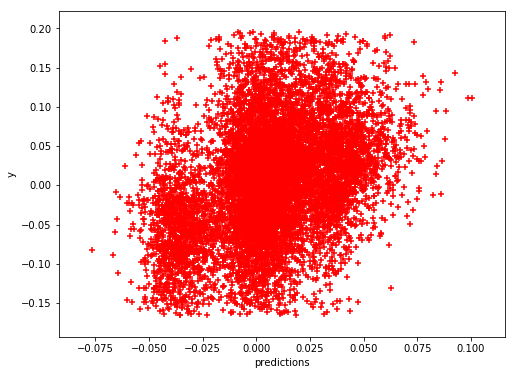

MSE: 0.004317859212428795


In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = ratespop[['mortgrate', 'unemp', 'cpi', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016']].values
# X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = ratespop.price

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("predictions")
plt.ylabel("y")
plt.show()

print("MSE:", mean_squared_error(y, predictions))

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     162.4
Date:                Sat, 07 Apr 2018   Prob (F-statistic):          9.01e-287
Time:                        13:49:10   Log-Likelihood:                 12149.
No. Observations:                9320   AIC:                        -2.428e+04
Df Residuals:                    9311   BIC:                        -2.422e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.4308      0.129    -18.819      0.000      -2.684      -2.178
x2             2.7883      0.135     20.685      0.000       2.524       3.053
x3            16.2702      1.077     15.112      0.000      14.160      18.381
x4          -3.94e+06   1.77e+06     -2.226      0.026   -7.41e+06   -4.71e+05
x5         -1.734e+04   6.09e+05     -0.028      0.977   -1.21e+06    1.18e+06
x6          -3.94e+06   1.77e+06     -2.226      0.026   -7.41e+06   -4.71e+05
x7          1.734e+04   6.09e+05      0.028      0.977   -1.18e+06    1.21e+06
x8          1.734e+04   6.09e+05      0.028      0.977   -1.18e+06    1.21e+06
x9           3.94e+06   1.77e+06      2.226      0.026    4.71e+05    7.41e+06
==============================================================================
Omnibus:                       66.376   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.710
Skew:                           0.204   Prob(JB):                     1.98e-15
Kurtosis:                       3.093   Cond. No.                     6.97e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.6e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

-------------------------------LINEAR MODEL---------------------------------

In [63]:
from sklearn import linear_model as LR

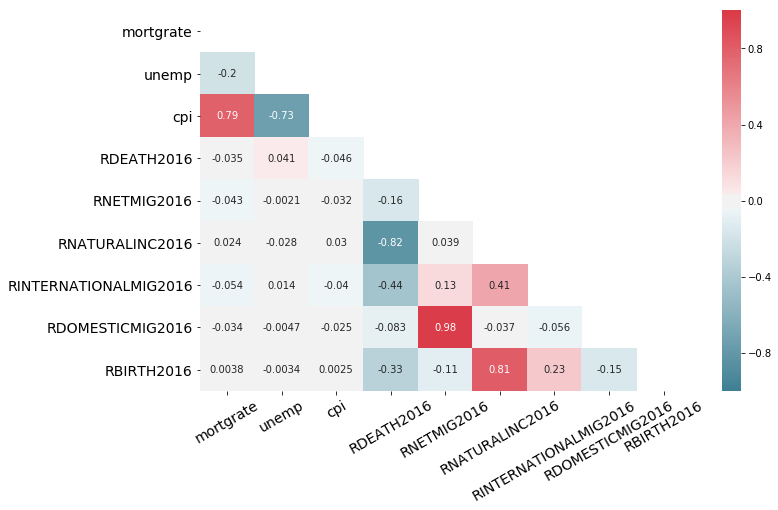

In [120]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = ratespop2.copy()
# df_with_target['price'] = y

correlation_heat_map(df_with_target)
#ratespop2['price']=y


In [65]:
#                            Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

-------------------------------MLR------------------------------------

In [66]:
from sklearn.cross_validation import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [37]:
print(len(x_train))
print(len(x_test))

1864
7456


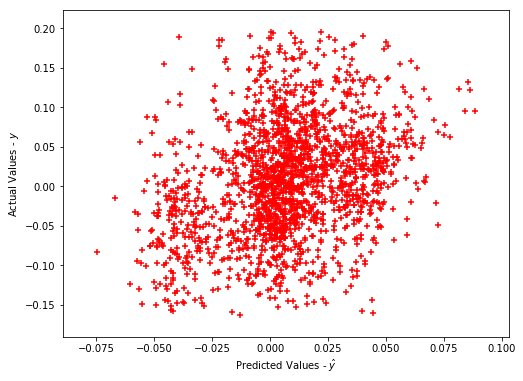

MSE: 0.004585420844985714


In [67]:
import statsmodels.api as sm

X = X_train#ratespop[['mortgrate', 'unemp', 'cpi', 'RDEATH2016', 'RNETMIG2016',
       #'RNATURALINC2016', 'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016',
       #'RBIRTH2016']].values
#X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = y_train#ratespop['price']

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print("MSE:", mean_squared_error(y_test, predictions))


In [68]:
ratespop[['mortgrate', 'unemp', 'cpi', 'RDEATH2016', 'RNETMIG2016',
       'RNATURALINC2016', 'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016',
       'RBIRTH2016']]

,mortgrate,unemp,cpi,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016
0,0.010616,-0.021505,0.004763,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952
1,0.010616,-0.021505,0.004763,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760
2,0.010616,-0.021505,0.004763,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454
3,0.010616,-0.021505,0.004763,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798
4,0.010616,-0.021505,0.004763,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835
5,0.010616,-0.021505,0.004763,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022
6,0.010616,-0.021505,0.004763,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501
7,0.010616,-0.021505,0.004763,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570
8,0.010616,-0.021505,0.004763,11.309054,-1.193043,1.056340,0.323116,-1.516159,12.365394
9,0.010616,-0.021505,0.004763,9.355189,-9.574140,4.458643,1.154470,-10.728610,13.813832


In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     138.3
Date:                Sat, 07 Apr 2018   Prob (F-statistic):          3.59e-242
Time:                        14:03:50   Log-Likelihood:                 9774.7
No. Observations:                7456   AIC:                        -1.953e+04
Df Residuals:                    7447   BIC:                        -1.947e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.5622      0.143    -17.910      0.000      -2.843      -2.282
x2             2.9493      0.149     19.740      0.000       2.656       3.242
x3            17.2360      1.193     14.452      0.000      14.898      19.574
x4          -3.48e+06   1.95e+06     -1.781      0.075   -7.31e+06     3.5e+05
x5         -6.985e+05    6.7e+05     -1.043      0.297   -2.01e+06    6.14e+05
x6          -3.48e+06   1.95e+06     -1.781      0.075   -7.31e+06     3.5e+05
x7          6.985e+05    6.7e+05      1.043      0.297   -6.14e+05    2.01e+06
x8          6.985e+05    6.7e+05      1.043      0.297   -6.14e+05    2.01e+06
x9           3.48e+06   1.95e+06      1.781      0.075    -3.5e+05    7.31e+06
==============================================================================
Omnibus:                       44.088   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.777
Skew:                           0.184   Prob(JB):                     1.89e-10
Kurtosis:                       3.091   Cond. No.                     6.93e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.72e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

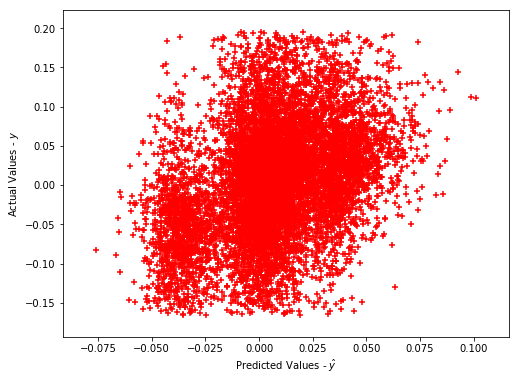

MSE: 0.004318391898567479


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     208.6
Date:                Sat, 07 Apr 2018   Prob (F-statistic):          7.64e-289
Time:                        14:04:01   Log-Likelihood:                 12149.
No. Observations:                9320   AIC:                        -2.428e+04
Df Residuals:                    9313   BIC:                        -2.423e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.4539      0.127    -19.269      0.000      -2.704      -2.204
x2             2.8084      0.133     21.041      0.000       2.547       3.070
x3            16.4419      1.065     15.444      0.000      14.355      18.529
x4         -3.955e+06   1.77e+06     -2.235      0.025   -7.42e+06   -4.87e+05
x5         -3.955e+06   1.77e+06     -2.235      0.025   -7.42e+06   -4.87e+05
x6             0.0011   7.45e-05     14.469      0.000       0.001       0.001
x7          3.955e+06   1.77e+06      2.235      0.025    4.87e+05    7.42e+06
==============================================================================
Omnibus:                       65.351   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.657
Skew:                           0.202   Prob(JB):                     3.36e-15
Kurtosis:                       3.095   Cond. No.                     6.90e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.6e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
import statsmodels.api as sm

X = ratespop[['mortgrate', 'unemp', 'cpi', 'RDEATH2016',
       'RNATURALINC2016',  'RDOMESTICMIG2016',
       'RBIRTH2016']].values
#X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = ratespop['price']

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print("MSE:", mean_squared_error(y, predictions))
model.summary()

#-----------------------LASSO REGRESSION----------------------------------

In [71]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[-0.  0. -0. -0.  0.  0.  0.  0.  0.]


In [72]:
from sklearn import metrics
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.07108088624989913


In [73]:
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[-0.  0. -0. -0.  0.  0.  0.  0.  0.]


In [74]:
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.07108088624989913


In [75]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

2.0873807796652318e-07

In [76]:
print(lassoregcv.coef_)

[-2.86591163e+00  3.22865799e+00  1.98239965e+01 -0.00000000e+00
  8.54962693e-04  1.38444072e-03 -0.00000000e+00  2.71796194e-04
  3.75147376e-05]


In [77]:
lassoregcv.get_params

<bound method BaseEstimator.get_params of LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=10, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=1, selection='cyclic', tol=0.0001,
    verbose=False)>

In [78]:
y_pred = lassoregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.06735628825060867


#-------------------------RIDGE REGRESSION----------------------------------------

In [80]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.06737542308202911


In [81]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.06794678615796394


In [82]:
print(ridgereg.coef_)

[-6.18468122e-01  9.01225749e-01  7.63350498e-01 -7.00553099e-04
  5.26872396e-04  5.35901522e-04  5.67662138e-04  5.17370873e-04
  7.29780328e-04]


In [83]:
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [84]:
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [85]:
y_pred = ridgeregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.06740000711321437


In [86]:
#remove the top percentiles from the price changed a lot, and then create a new column
#where 0 is price != increase, and 1 is price increased, run a logistic regression and see what
q = popdf["price"].quantile(0.99)
popdf = popdf[popdf["price"] < q]

q = popdf["price"].quantile(0.05)
popdf  = popdf[popdf["price"] > q]

In [87]:
popdf['price'].mean()

0.012009181539013224

In [88]:
print('price change mean')
print(popdf['price'].mean())
print('price change max')
print(popdf['price'].max())
print('change in price min')
print(popdf['price'].min())

price change mean
0.012009181539013224
price change max
0.17510864579218044
change in price min
-0.11172933175968114


In [89]:
popdf['price'].values

array([-0.02456784, -0.09373109, -0.07749532, ...,  0.13896915,
        0.06789361, -0.06578668])

In [91]:
#this creates a new column that is bool
popdf['pricebool'] = popdf['price'].apply(lambda x: 1 if (x > 0) else 0)
popdf['pricebool'].unique()

array([0, 1], dtype=int64)

In [92]:
from sklearn.linear_model import LogisticRegression
y = popdf.pricebool.values
X = popdf[['RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016']].values

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
print(popdf[0:5])

                county  RDEATH2016  RNETMIG2016  RNATURALINC2016  \
Year                                                               
2011-01-01  Autauga AL    9.218433     6.163804         2.345519   
2011-01-01  Baldwin AL    9.868812    15.757654         1.962947   
2011-01-01  Barbour AL   11.632586    -1.280316         0.621868   
2011-01-01   Blount AL    9.871136     1.755255         3.058662   
2011-01-01   Coffee AL   10.092682     2.721845         3.397340   

            RINTERNATIONALMIG2016  RDOMESTICMIG2016  RBIRTH2016     price  \
Year                                                                        
2011-01-01               0.327282          5.836523   11.563952 -0.024568   
2011-01-01               0.989585         14.768069   11.831760 -0.093731   
2011-01-01              -0.146322         -1.133994   12.254454 -0.077495   
2011-01-01              -0.052136          1.807391   12.929798 -0.086218   
2011-01-01               1.728471          0.993374   13.4900

In [94]:
print ('Logreg intercept:', logreg.intercept_)
print ('Logreg coef(s):', logreg.coef_)
print ('Logreg predicted probabilities:', logreg.predict_proba(X[0:5,:]))
print(X[0:5,:])

Logreg intercept: [-0.2385668]
Logreg coef(s): [[0.00719765 0.02987804 0.02084355 0.02732996 0.00254808 0.0280412 ]]
Logreg predicted probabilities: [[0.39917131 0.60082869]
 [0.32286412 0.67713588]
 [0.4609273  0.5390727 ]
 [0.42203462 0.57796538]
 [0.39789124 0.60210876]]
[[ 9.21843323  6.16380447  2.34551851  0.32728165  5.83652281 11.56395174]
 [ 9.86881239 15.75765441  1.96294734  0.98958502 14.76806939 11.83175973]
 [11.63258587 -1.28031605  0.6218678  -0.14632184 -1.13399422 12.25445367]
 [ 9.87113648  1.7552549   3.05866201 -0.05213628  1.80739119 12.92979849]
 [10.09268181  2.72184529  3.39733974  1.7284711   0.99337419 13.49002156]]


#---------------------Multinomial LogReg------------------------

In [95]:
indep_vars = ['RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016']
x_mat = sm.add_constant(popdf[indep_vars])
y_vec = popdf.pricebool
glm_logit = sm.GLM(y_vec, 
                   x_mat,
                   sm.families.Binomial(sm.families.links.logit)).fit()

In [96]:
glm_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              pricebool   No. Observations:                 8764
Model:                            GLM   Df Residuals:                     8757
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -5887.4
Date:                Sat, 07 Apr 2018   Deviance:                       11775.
Time:                        14:12:02   Pearson chi2:                 8.79e+03
No. Iterations:                   100                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2462      0.183     -1.347      0.178      -0.604       0.112
RDEATH2016            -4.442e+07   5.71e+07     -0.778      0.437   -1.56e+08    6.75e+07
RNETMIG2016            1.953e+06   1.99e+07      0.098      0.922    -3.7e+07    4.09e+07
RNATURALINC2016       -4.442e+07   5.71e+07     -0.778      0.437   -1.56e+08    6.75e+07
RINTERNATIONALMIG2016 -1.953e+06   1.99e+07     -0.098      0.922   -4.09e+07     3.7e+07
RDOMESTICMIG2016      -1.953e+06   1.99e+07     -0.098      0.922   -4.09e+07     3.7e+07
RBIRTH2016             4.442e+07   5.71e+07      0.778      0.437   -6.75e+07    1.56e+08
=========================================================================================
"""

In [97]:
import math
math.exp(-0.5600)

0.5712090638488149

In [98]:
#http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

from statsmodels.formula.api import rlm
price_model = rlm("price ~ RNATURALINC2016 + RBIRTH2016 + RDEATH2016", data=popdf, 
                      M=sm.robust.norms.TukeyBiweight(3)).fit(conv="weights")
print(price_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  price   No. Observations:                 8764
Model:                            RLM   Df Residuals:                     8760
Method:                          IRLS   Df Model:                            3
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 07 Apr 2018                                         
Time:                        14:12:33                                         
No. Iterations:                    50                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0146      0.006     

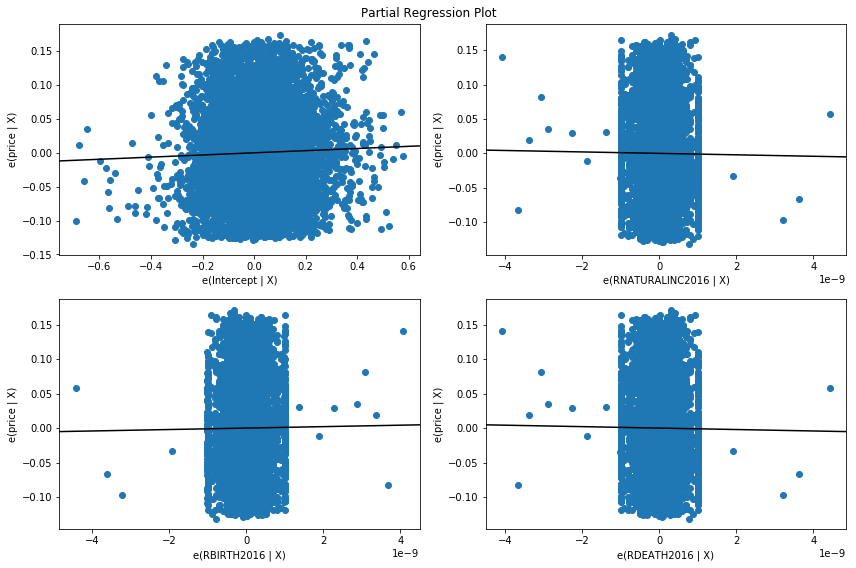

In [99]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(price_model, fig=fig)

#----------------------Decision Tree-----------------------

In [100]:
from sklearn.tree import DecisionTreeRegressor
x = ratespop['mortgrate']
y = ratespop['price']

dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(x[:, np.newaxis], y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

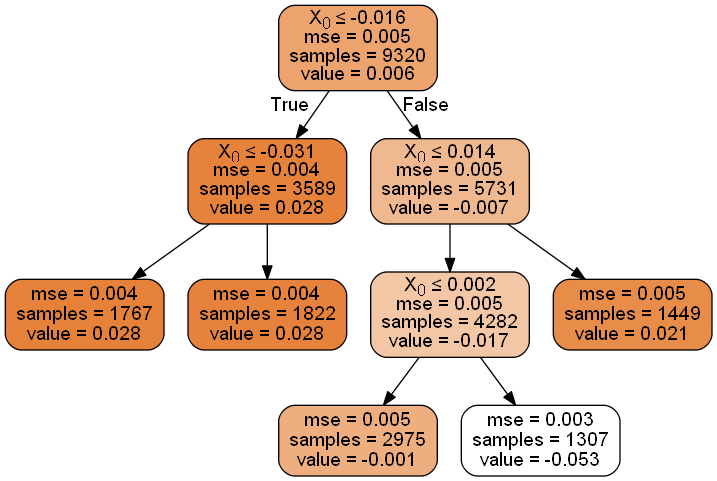

In [101]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Index(['mortgrate', 'unemp', 'month', 'year', 'cpi', 'county', 'RDEATH2016',
       'RNETMIG2016', 'RNATURALINC2016', 'RINTERNATIONALMIG2016',
       'RDOMESTICMIG2016', 'RBIRTH2016', 'price'],
      dtype='object')